# Landuse machine learning model -test-

This notebook integrates the first steps towards the development of a machine learning model for urban landuse prediction.

## Import libraries

In [9]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 MB 2.2 MB/s eta 0:00:000m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 435.0 kB/s eta 0:00:00 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 6.0 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 3.1 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 19.9 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 1.0 MB/s eta 0:00:000m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 13.8 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 16.6 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 1.2 MB/s eta 0:00:000m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.2/106.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 M

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup
else:
    import aup

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE  



from keras import utils                                   # tools for creating one-hot encoding
from keras.models import Sequential                       # Type of model we wish to use
from keras.layers import Dense, Dropout, Activation  
from sklearn.preprocessing import LabelEncoder
# from scikeras.wrappers import KerasClassifier, KerasRegressor
from keras import utils  
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
# from sklearn.pipeline import Pipeline

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,confusion_matrix

2025-05-24 08:01:26.295674: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-24 08:01:26.309168: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-24 08:01:26.319419: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-24 08:01:26.333959: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748073686.355852   12509 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748073686.36

## Data for model training

In [2]:
gdf = gpd.read_file('all_places_cleaned.geojson')
print(gdf.shape)
gdf.head(2)

(467839, 9)


,gid,id,distrito,shape_leng,shape_area,layer,path,UNuso,geometry
0,119895,95475.0,2.0,54.193112,130.922608,USOS_DE_SUELO_Z2,/Users/eileenyuen/Downloads/OneDrive_1_30-4-20...,Habitacional,"MULTIPOLYGON (((672237.33 2295207.029, 672235...."
1,119896,471562.0,2.0,47.842126,112.073148,USOS_DE_SUELO_Z2,/Users/eileenyuen/Downloads/OneDrive_1_30-4-20...,Habitacional,"MULTIPOLYGON (((669537.234 2295451.983, 669520..."


In [3]:
gdf.columns

Index(['gid', 'id', 'distrito', 'shape_leng', 'shape_area', 'layer', 'path',
       'UNuso', 'geometry'],
      dtype='object')

## We only use district 5 

In [5]:
gdf["layer"].unique()

array(['USOS_DE_SUELO_Z2', 'USOS_DE_SUELO_Z4', 'USOS_Z11', 'USOS_ZONA_10',
       'USOS_ZONA_5', 'USOS_ZONA_6', 'USOS_ZONA_7', 'USOS_ZONA_8',
       'USOS_ZONA_9', 'Z_12_USOS_DE_SUELO', 'Z1', 'Z3'], dtype=object)

In [7]:
gdf_district_5 = gdf.copy()
gdf_district_5[gdf_district_5["layer"] == "USOS_ZONA_5"]

,gid,id,distrito,shape_leng,shape_area,layer,path,UNuso,geometry
176598,383802,225938.0,5.0,87.833373,372.671854,USOS_ZONA_5,/Users/eileenyuen/Downloads/OneDrive_1_30-4-20...,Baldio,"MULTIPOLYGON (((663603.887 2289224.482, 663592..."
176599,383514,465151.0,5.0,156.734778,1505.830715,USOS_ZONA_5,/Users/eileenyuen/Downloads/OneDrive_1_30-4-20...,None,"MULTIPOLYGON (((661583.201 2289149.452, 661563..."
176600,383647,465323.0,5.0,102.854373,577.067362,USOS_ZONA_5,/Users/eileenyuen/Downloads/OneDrive_1_30-4-20...,Baldio,"MULTIPOLYGON (((663882.141 2291543.517, 663858..."
176601,383515,465183.0,5.0,389.147415,6545.629993,USOS_ZONA_5,/Users/eileenyuen/Downloads/OneDrive_1_30-4-20...,Comercial,"MULTIPOLYGON (((663075.532 2287066.125, 663077..."
176602,383516,465188.0,5.0,2338.338291,110638.820370,USOS_ZONA_5,/Users/eileenyuen/Downloads/OneDrive_1_30-4-20...,Baldio,"MULTIPOLYGON (((663416.134 2290742.644, 663416..."
...,...,...,...,...,...,...,...,...,...
221520,467228,NaN,5.0,NaN,NaN,USOS_ZONA_5,/Users/eileenyuen/Downloads/OneDrive_1_30-4-20...,Turistico,"MULTIPOLYGON (((661786.023 2290340.715, 661846..."
221521,467229,NaN,5.0,NaN,NaN,USOS_ZONA_5,/Users/eileenyuen/Downloads/OneDrive_1_30-4-20...,Habitacional,"MULTIPOLYGON (((661908.505 2289978.212, 661908..."
221522,467230,NaN,5.0,NaN,NaN,USOS_ZONA_5,/Users/eileenyuen/Downloads/OneDrive_1_30-4-20...,Habitacional,"MULTIPOLYGON (((661904.541 2289924.284, 661904..."
221523,467231,NaN,5.0,NaN,NaN,USOS_ZONA_5,/Users/eileenyuen/Downloads/OneDrive_1_30-4-20...,Habitacional,"MULTIPOLYGON (((661934.366 2289948.246, 661942..."


In [12]:
gdf_district_5.isna().sum() # Searching for NA values

gid             0
id            105
distrito        1
shape_leng    105
shape_area    105
layer           0
path            0
UNuso           0
geometry        1
dtype: int64

In [10]:
gdf_district_5["UNuso"] = gdf_district_5["UNuso"].fillna("Sin_datos")

In [11]:
gdf_district_5.isna().sum()

gid             0
id            105
distrito        1
shape_leng    105
shape_area    105
layer           0
path            0
UNuso           0
geometry        1
dtype: int64

In [13]:
gdf_district_5.shape

(467839, 9)

## Machine learning model

### Data preprocessing

Divide X and Y data

In [4]:
X = gdf[['area_m2','bld_area_m2','pobtot','uso_tot',
                 'pct_habitacional','pct_servicios','pct_comercio',
                 'pct_salud','pct_educacion','pct_gobierno','pct_industria',
        'block_area_m2','pred_area_pct','temperature_mean_diff',
        'ndvi_mean','ndmi_diff']].to_numpy()
Y = gdf[['UNUSO']].to_numpy()
Y = np.reshape(Y, shape=(Y.shape[0],))

Standarize and encode data

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

Divide training, validation and testing data

In [6]:
X_model, X_test, y_model, y_test = (train_test_split(X_scaled, encoded_Y, test_size=0.2, random_state=0))

In [8]:
smote = SMOTE()  
X_resampled, y_resampled = smote.fit_resample(X_model, y_model)  

In [9]:
X_train, X_val, y_train, y_val = (train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0))

Y data to categorical

In [10]:
# encode class values as integers
num_classes = len(gdf.UNUSO.unique())

# convert integers to dummy variables (i.e. one hot encoded)
y_train = utils.to_categorical(y_train, num_classes)

# convert integers to dummy variables (i.e. one hot encoded)
y_val = utils.to_categorical(y_val, num_classes)

# convert integers to dummy variables (i.e. one hot encoded)
y_test = utils.to_categorical(y_test, num_classes)

### Model construction -- Classification Neural network

Model parameters

In [11]:
input_shape = (X_train.shape[1],)

In [12]:
### Construct Keras model

# A sequential model is a linear stack of layers
model = Sequential()

# First layer: fully-connected with relu activation
model.add(Dense(64, input_shape=input_shape))
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Second layer: fully-connected with relu activation
model.add(Dense(64))   # Input shape is determined automatically from previous layer
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Third layer: 10 nodes, one for each class, and softmax activation
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Configure the model's training settings
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Print out model summary
print(model.summary())
    

/home/edgaregurrola/.cache/pypoetry/virtualenvs/aup-qDsIK5d5-py3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1745593913.493267   16678 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4581 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 11)             │           715 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 11)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,963 (23.29 KB)

 Trainable params: 5,963 (23.29 KB)

 Non-trainable params: 0 (0.00 B)

None


Model training

In [13]:
### Train the model
history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=200,
                    verbose=1,
                    validation_data=(X_val, y_val)
                   )

Epoch 1/200


I0000 00:00:1745593915.627850   17212 service.cc:152] XLA service 0x7fe3b0009ed0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745593915.627871   17212 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Ti, Compute Capability 8.9
2025-04-25 09:11:55.641493: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745593915.710203   17212 cuda_dnn.cc:529] Loaded cuDNN version 90300


 284/4344 ━━━━━━━━━━━━━━━━━━━━ 2s 534us/step - acc: 0.2404 - loss: 2.1819

I0000 00:00:1745593916.371148   17212 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4344/4344 ━━━━━━━━━━━━━━━━━━━━ 5s 975us/step - acc: 0.4904 - loss: 1.5107 - val_acc: 0.6885 - val_loss: 0.9136
Epoch 2/200
4344/4344 ━━━━━━━━━━━━━━━━━━━━ 3s 633us/step - acc: 0.6483 - loss: 1.0216 - val_acc: 0.7206 - val_loss: 0.7929
Epoch 3/200
4344/4344 ━━━━━━━━━━━━━━━━━━━━ 3s 598us/step - acc: 0.6731 - loss: 0.9363 - val_acc: 0.7377 - val_loss: 0.7376
Epoch 4/200
4344/4344 ━━━━━━━━━━━━━━━━━━━━ 3s 587us/step - acc: 0.6886 - loss: 0.8834 - val_acc: 0.7524 - val_loss: 0.7053
Epoch 5/200
4344/4344 ━━━━━━━━━━━━━━━━━━━━ 3s 616us/step - acc: 0.6984 - loss: 0.8559 - val_acc: 0.7603 - val_loss: 0.6776
Epoch 6/200
4344/4344 ━━━━━━━━━━━━━━━━━━━━ 3s 620us/step - acc: 0.7025 - loss: 0.8336 - val_acc: 0.7725 - val_loss: 0.6547
Epoch 7/200
4344/4344 ━━━━━━━━━━━━━━━━━━━━ 3s 606us/step - acc: 0.7078 - loss: 0.8222 - val_acc: 0.7720 - val_loss: 0.6463
Epoch 8/200
4344/4344 ━━━━━━━━━━━━━━━━━━━━ 3s 609us/step - acc: 0.7128 - loss: 0.8076 - val_acc: 0.7801 - val_loss: 0.6234
Epoch 9/200
4344/4344 ━━━━━━

Evaluate model

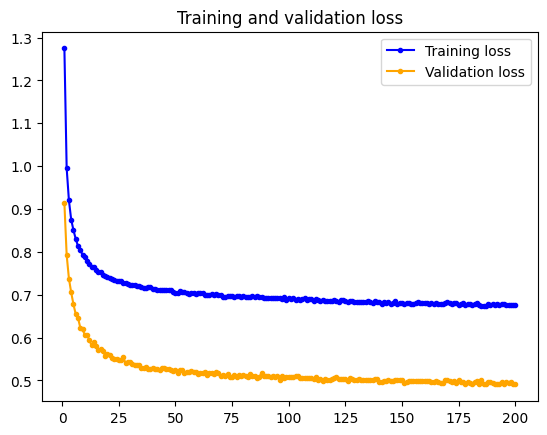

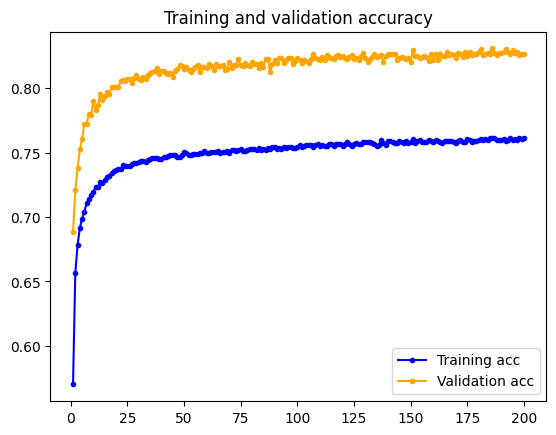

In [14]:
### Plot training and validation accuracy and loss over time

# Extract accuracy and loss values (in list form) from the history
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a list of epoch numbers
epochs = range(1, len(acc) + 1)

# Plot training and validation loss values over time
plt.figure()
plt.plot(epochs, loss, color='blue', marker='.', label='Training loss')
plt.plot(epochs, val_loss, color='orange', marker='.', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

# Plot training and validation accuracies over time
plt.figure()
plt.plot(epochs, acc, color='blue', marker='.', label='Training acc')
plt.plot(epochs, val_acc, color='orange', marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [15]:
### Create confusion matrix from validation set

# Find predictions from all validation samples
y_pred = model.predict(X_val)
print("Validation output shape:", y_pred.shape)

# Convert actual and predicted validation one-hot encoding to numerical labels
y_val_trans = np.argmax(y_val, axis=1)
y_pred_trans = np.argmax(y_pred, axis=1)

# Print some values from actual and predicted validation sets (first 50 samples)
print("Actual validation labels:\t", y_val_trans[:50])
print("Predicted validation labels:\t", y_pred_trans[:50])

# Compute confusion matrix (note: we need to transpose SKLearn matrix to make it match Edge Impulse)
cm = confusion_matrix(y_val_trans, y_pred_trans)
cm = np.transpose(cm)

labels = range(len(gdf['UNUSO'].unique()))

# Print confusion matrix
print()
print(" ---> Predicted labels")
print("|")
print("v Actual labels")
print("\t\t\t" + ' '.join("{!s:6}".format('(' + str(i) + ')') for i in range(num_classes)))
for row in range(num_classes):
  print("{:>12} ({}):  [{}]".format(labels[row], row, ' '.join("{:6}".format(i) for i in cm[row])))
    

1086/1086 ━━━━━━━━━━━━━━━━━━━━ 1s 416us/step
Validation output shape: (34747, 11)
Actual validation labels:	 [ 9  7  8  3 10  2  8  0  3 10  7  5  6  1  5  2  3  5  7  6  6 10  9  3
  3  5  8  7  8  3  3  7  3  5  9  8  2 10  8  0  7  2  3  8  5  6  2  6
  9  4]
Predicted validation labels:	 [ 9  7  8  3 10  2  3  3  3 10  7  5  6  1  5  2  3  5  7  6  6 10  9  3
  3  5  8  7  0  3  3  7  4  5  9  8  2 10  8  4  7  2  3  7  5  6  8  6
  9  8]

 ---> Predicted labels
|
v Actual labels
			(0)    (1)    (2)    (3)    (4)    (5)    (6)    (7)    (8)    (9)    (10)  
           0 (0):  [  1756     18     12    184    343     13      0      7    162      0      0]
           1 (1):  [   122   2658     93     26    158     17      0     28    642      0      0]
           2 (2):  [    71     35   2738    107    155      0      0      0    192      0      0]
           3 (3):  [   296     20     54   2599    269     29      0      4    156      0      0]
           4 (4):  [   502     94     7

Predict landuse for every element

In [16]:
y_hat = model.predict(X_scaled)

836/836 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step


2025-04-25 09:21:04.340275: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_16', 8 bytes spill stores, 8 bytes spill loads



Assign data to polygons

In [17]:
gdf['pred'] = y_hat.argmax(axis=1)

### Save output

In [18]:
gdf.to_file('../../data/processed/prediccion_uso_suelo/tess_pred_test.geojson')